# Portfolio Assignment: Text Classification
### Abdullah Hasani - AHH190004

Text classification using the [Eye State Classification EEG Dataset](https://www.kaggle.com/datasets/robikscube/eye-state-classification-eeg-dataset?select=EEG_Eye_State_Classification.csv)

In [109]:
import pandas as pd
from numpy import mean
from numpy import std

# Load the dataset 
df = pd.read_csv('eeg.csv', error_bad_lines=False)

# Clean the dataset
df = df.dropna()
# remove columns with values less than 0
df = df[(df >= 0).all(1)]
df = df.reset_index(drop=True)

# Remove outliers
for i in range(df.shape[1]-1): 
    d_mean = mean(values[:,i])
    d_std = std(values[:,i])
    cut_off = d_std * 3
    lower, upper = d_mean - cut_off, d_mean + cut_off
    small = [j for j in range(values.shape[0]) if values[j,i] < lower]
    large = [j for j in range(values.shape[0]) if values[j,i] > upper]

# Print the shape of the dataset
print("Size of the dataset: ", df.shape)
print(df.head())

Size of the dataset:  (14980, 15)
       AF3       F7       F3      FC5       T7       P7       O1       O2  \
0  4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
1  4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
2  4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
3  4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
4  4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   

        P8       T8      FC6       F4       F8      AF4  eyeDetection  
0  4222.05  4238.46  4211.28  4280.51  4635.90  4393.85             0  
1  4210.77  4226.67  4207.69  4279.49  4632.82  4384.10             0  
2  4207.69  4222.05  4206.67  4282.05  4628.72  4389.23             0  
3  4217.44  4235.38  4210.77  4287.69  4632.31  4396.41             0  
4  4210.77  4244.10  4212.82  4288.21  4632.82  4398.46             0  


/Users/hasani/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


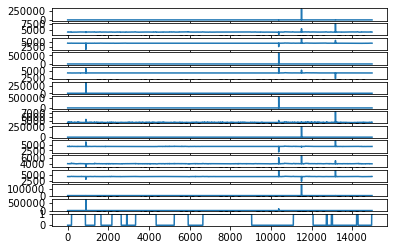

In [110]:
from matplotlib import pyplot

from numpy import delete
from numpy import savetxt

# retrieve data as numpy array
values = df.values

# create a subplot for each time series
pyplot.figure()
for i in range(values.shape[1]):
	pyplot.subplot(values.shape[1], 1, i+1)
	pyplot.plot(values[:, i])
pyplot.show()

In [131]:
# Target variable: eyeDetection
# Features: AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, FC6, F4, F8, AF4
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X = df.drop('eyeDetection', axis=1)
y = df['eyeDetection']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

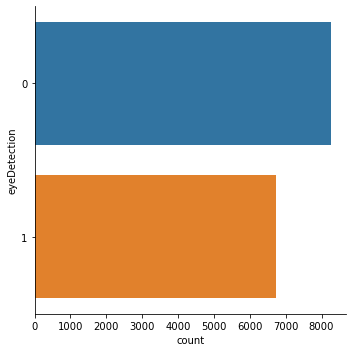

In [132]:
import seaborn as sb

# Distribution graph of the target variable in the dataset
sb.catplot(y='eyeDetection', kind='count', data=df)

In [133]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn import metrics

# Train and evaluate a Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

# Print the classification report, accuracy, precision and recall of the model
print(classification_report(y_test, nb_pred))
print("Accuracy:",metrics.accuracy_score(y_test, nb_pred))
print("Precision:",metrics.precision_score(y_test, nb_pred))
print("Recall:",metrics.recall_score(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.60      0.03      0.06      1625
           1       0.46      0.98      0.62      1371

    accuracy                           0.46      2996
   macro avg       0.53      0.50      0.34      2996
weighted avg       0.54      0.46      0.32      2996

Accuracy: 0.4629506008010681
Precision: 0.4591906721536351
Recall: 0.9766593727206418


In [134]:
from sklearn.linear_model import LogisticRegression

# Train and evaluate a Logistic Regression model
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Print the classification report and accuracy of the model
print(classification_report(y_test, lr_pred))
print("Accuracy:",metrics.accuracy_score(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.64      0.78      0.70      1625
           1       0.65      0.48      0.55      1371

    accuracy                           0.64      2996
   macro avg       0.64      0.63      0.63      2996
weighted avg       0.64      0.64      0.63      2996

Accuracy: 0.6415220293724967


/Users/hasani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [135]:
from sklearn.neural_network import MLPClassifier

# Train and evaluate a Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=0)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)

# Print the classification report and accuracy of the model
print(classification_report(y_test, nn_pred))
print("Accuracy:",metrics.accuracy_score(y_test, nn_pred))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70      1625
           1       0.00      0.00      0.00      1371

    accuracy                           0.54      2996
   macro avg       0.27      0.50      0.35      2996
weighted avg       0.29      0.54      0.38      2996

Accuracy: 0.5423898531375166


/Users/hasani/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hasani/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hasani/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Analysis

Overall, the Logistic Regression model worked the best, followed by the Neural Network and then the Naive Bayes algorithms. The accuracy scores overall were very low and not indicative of a very strong correlation, likely because there is little correlation between the EEG headset data and the state of a person's eyes being open or shut. All the accuracy scores were within 15% of a random guess, with the LR anf NN algorithms doing better and slightly better than a random guess and NB doing slightly worse.
One possible explanation for the low accuracy is that the data used to train and test the models was limited to a 117-second sample that was manually labeled. Increasing the amount of data fed into the Neural Network model could be beneficial in the long run, as Neural Networks tend to perform better with larger datasets.
Overall, the results suggest that further research is needed to better understand the relationship between EEG headset data and the state of a person's eyes being open or shut.